# Viewing UM healpix output on JASMIN object store

* Demonstrates loading a single field from the 2D (freq = PT1H) data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import easygems.healpix as egh

In [22]:
from um_to_healpix.util import load_config
import um_to_healpix.plotting as umplt

In [4]:
config = load_config('../config/hk26_config.py')

print(f'Currently using {config.output_vn=}, {config.deploy=}')
print('Sims:\n' + '\n'.join(list(config.processing_config)))

Currently using config.output_vn='v6.1', config.deploy='dev'
Sims:
glm.n2560_RAL3p3.tuned


In [5]:
def open_remote_dataset(sim, freq, zoom, on_jasmin=False):
    if on_jasmin:
        protocol = 'http'
        baseurl = 'hackathon-o.s3.jc.rl.ac.uk'
    else:
        protocol = 'https'
        baseurl = 'hackathon-o.s3-ext.jc.rl.ac.uk'
    url = f'{protocol}://{baseurl}/sim-data/{config.deploy}/{config.output_vn}/{sim}/um.{freq}.hp_z{zoom}.zarr'
    print(url)
    ds = xr.open_dataset(url, engine='zarr')
    ds = ds.pipe(egh.attach_coords)
    return ds

In [6]:
sim = 'glm.n2560_RAL3p3.tuned'
freq = 'PT1H'  # 2D
# freq = 'PT3H'  # 3D
zoom = 10

ds = open_remote_dataset(sim, freq, zoom)

https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/v6.1/glm.n2560_RAL3p3.tuned/um.PT1H.hp_z10.zarr


In [7]:
ds

<xarray.Dataset> Size: 12TB
Dimensions:  (time: 9745, cell: 12582912)
Coordinates:
  * time     (time) datetime64[ns] 78kB 2020-01-20 ... 2021-03-01
    crs      int64 8B 0
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat      (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon      (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Data variables: (12/24)
    clt      (time, cell) float32 490GB ...
    hflsd    (time, cell) float32 490GB ...
    hfssd    (time, cell) float32 490GB ...
    huss     (time, cell) float32 490GB ...
    pr       (time, cell) float32 490GB ...
    prs      (time, cell) float32 490GB ...
    ...       ...
    rsut     (time, cell) float32 490GB ...
    rsutcs   (time, cell) float32 490GB ...
    tas      (time, cell) float32 490GB ...
    ts       (time, cell) float32 490GB ...
    uas      (time, cell) float32 490GB ...
    vas      (time, cell) float32 490GB ...
Attributes:
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3.tuned
    simulation_description:           The MetUM uses a regular lat-lon grid, ...
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...

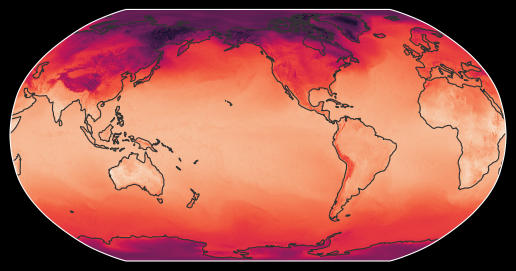

In [8]:
# Quickplot tas (surface temperature)
egh.healpix_show(ds.tas.sel(time='2020-01-25 11:00'))

In [9]:
ds.tas

<xarray.DataArray 'tas' (time: 9745, cell: 12582912)> Size: 490GB
[122620477440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 78kB 2020-01-20 ... 2021-03-01
    crs      int64 8B 0
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat      (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon      (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Attributes:
    standard_name:  air_temperature
    units:          K
    source:         Data from Met Office Unified Model
    um_version:     13.5
    STASH:          [1, 3, 236]
    long_name:      air_temperature
    UM_name:        tas
    grid_mapping:   healpix_nested
    healpix_zoom:   10

# General overview plotting

In [18]:
start_date = pd.Timestamp('2020-01-20 01:00:00')
end_date = pd.Timestamp('2020-01-21 01:00:00')
pr = ds['pr'].sel(time=slice(start_date, end_date)).compute()
# tas = ds['tas'].sel(time=slice(start_date, end_date)).compute()
# clt = ds['clt'].sel(time=slice(start_date, end_date)).compute()

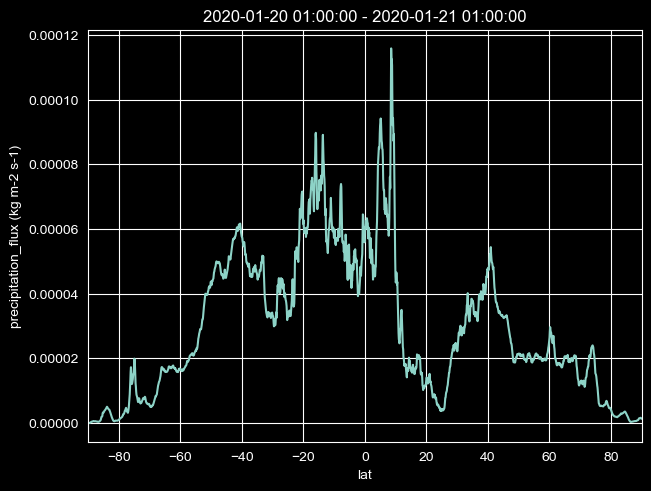

In [19]:
umplt.plot_zonal_mean(pr)

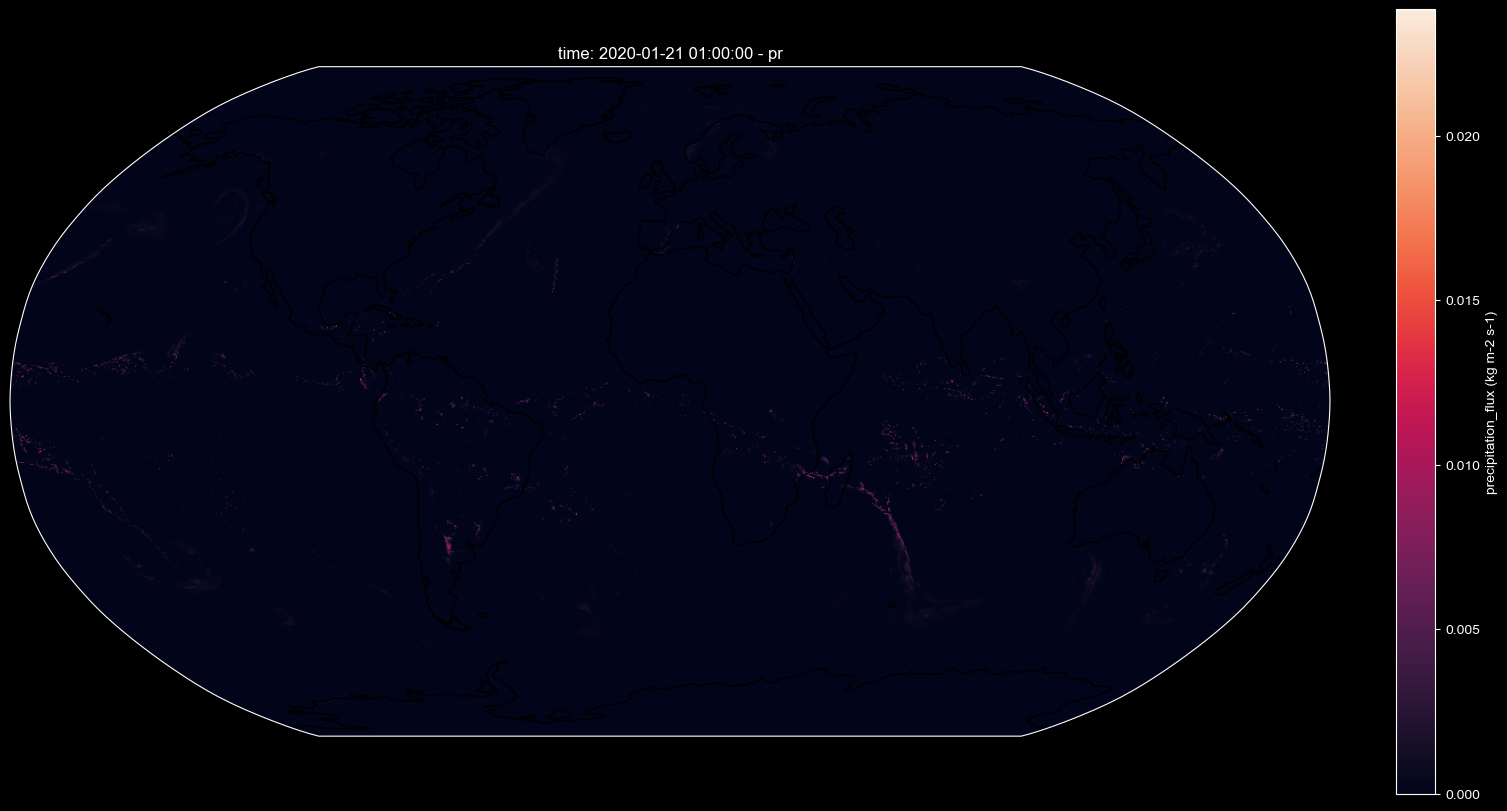

In [20]:
umplt.plot_field_for_times(pr)

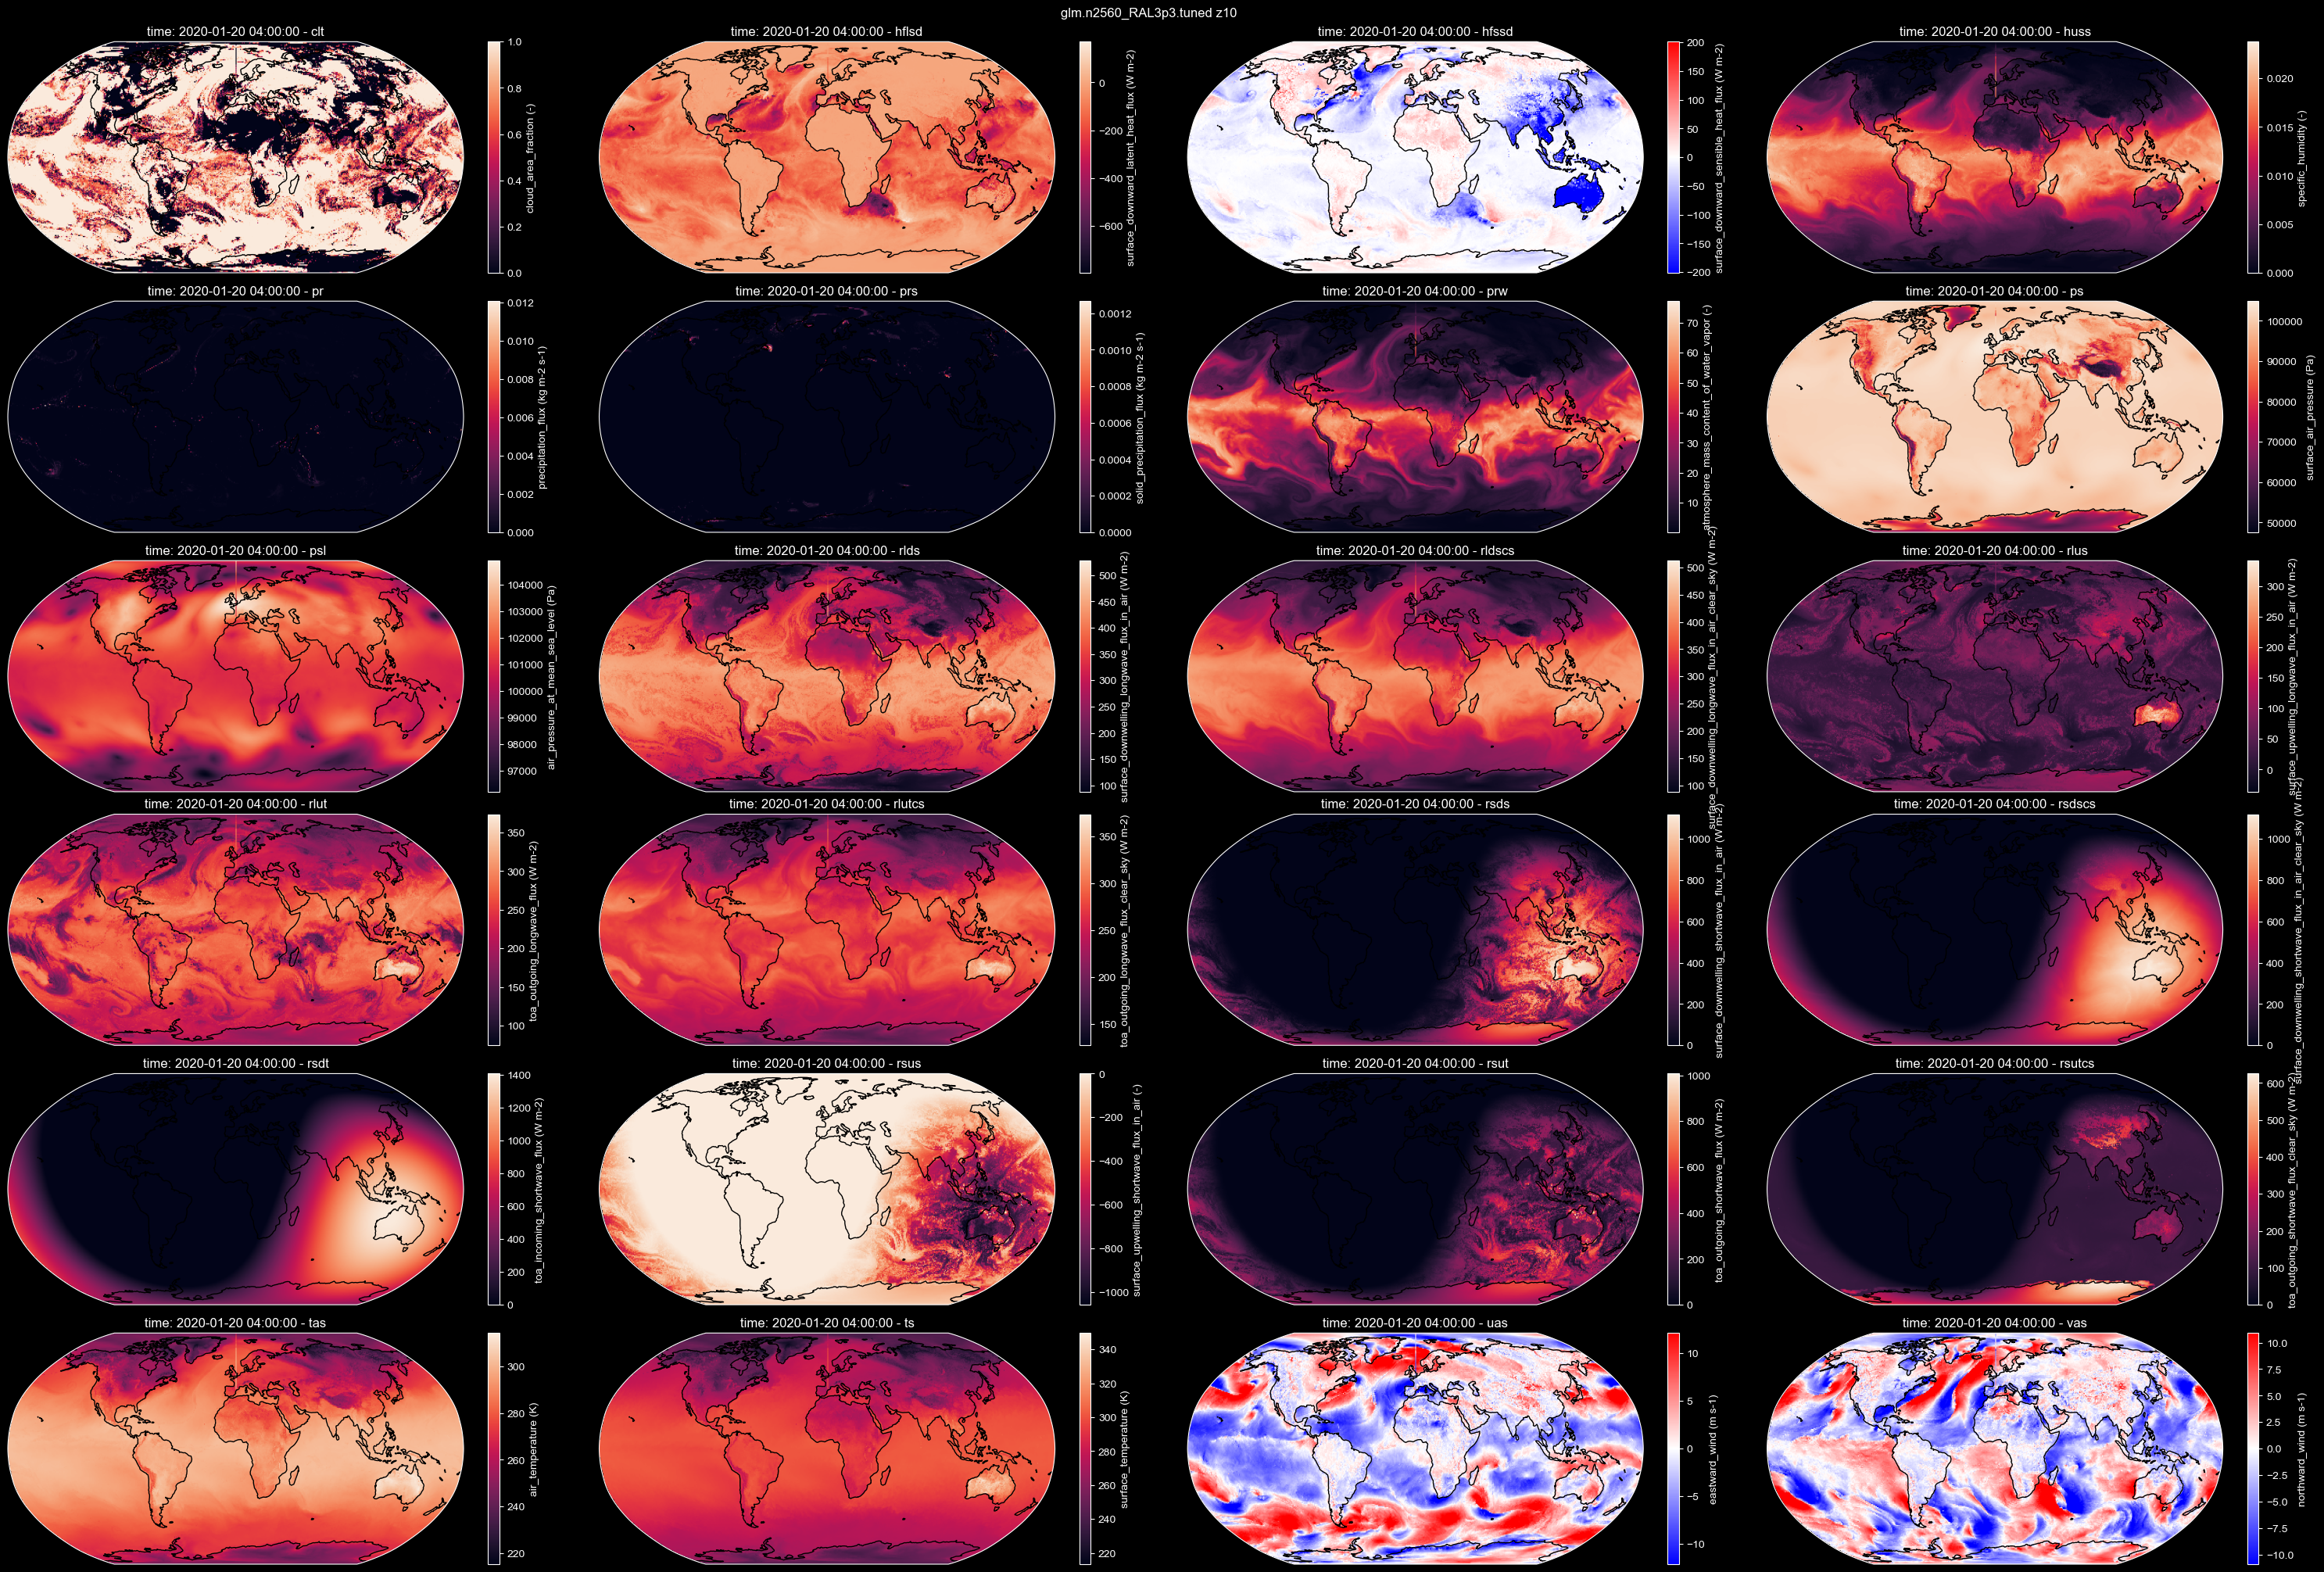

In [21]:
ds_plot = ds.isel(time=4).compute()

umplt.plot_all_fields(ds_plot)


In [ ]:
end_date = pd.Timestamp('2020-01-25 01:00:00')
pr = ds['pr'].sel(time=slice(start_date, end_date)).compute()
umplt.plot_field_global_mean_timeseries(pr)